# Maternal Health Risk care

In [1]:
%matplotlib notebook
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve



### download the data from https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data/download
### importing the data
the data we used in this project is `Maternal Health Risk Data Set.csv`,This Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

`age`: Age in years when a woman is pregnant.

`SystolicBP`: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.

`DiastolicBP`: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

`BS`: Blood glucose levels is in terms of a molar concentration, mmol/L.

`HeartRate`: A normal resting heart rate in beats per minute.

`Risk` Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

In [34]:
df = pd.read_table('C://Users//lenovo//Maternal Health Risk Data Set.csv', sep=',', na_values='?')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [35]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['RiskLevel'])
one_hot_encoded_data
dfX2 = one_hot_encoded_data.iloc[: , [0,1,2,3,4,5]].copy()
dfy2 = one_hot_encoded_data.iloc[:, [6,7,8]]

### preprocessing step
We changed first the the labels to be numerical then we apply polynomial for 2 degree then applied standard scaler for the data

In [36]:
RiskLevel = {'low risk':0, 
        'mid risk':1, 
        'high risk':2}

# apply using map
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)

dfy=df['RiskLevel']
dfx=df.drop('RiskLevel', 1)

In [6]:
poly = PolynomialFeatures(degree=2)

X_F1_poly = poly.fit_transform(dfx)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy,
                                                   random_state = 0)

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Visualizing the data set as histogram and as heat map

<IPython.core.display.Javascript object>


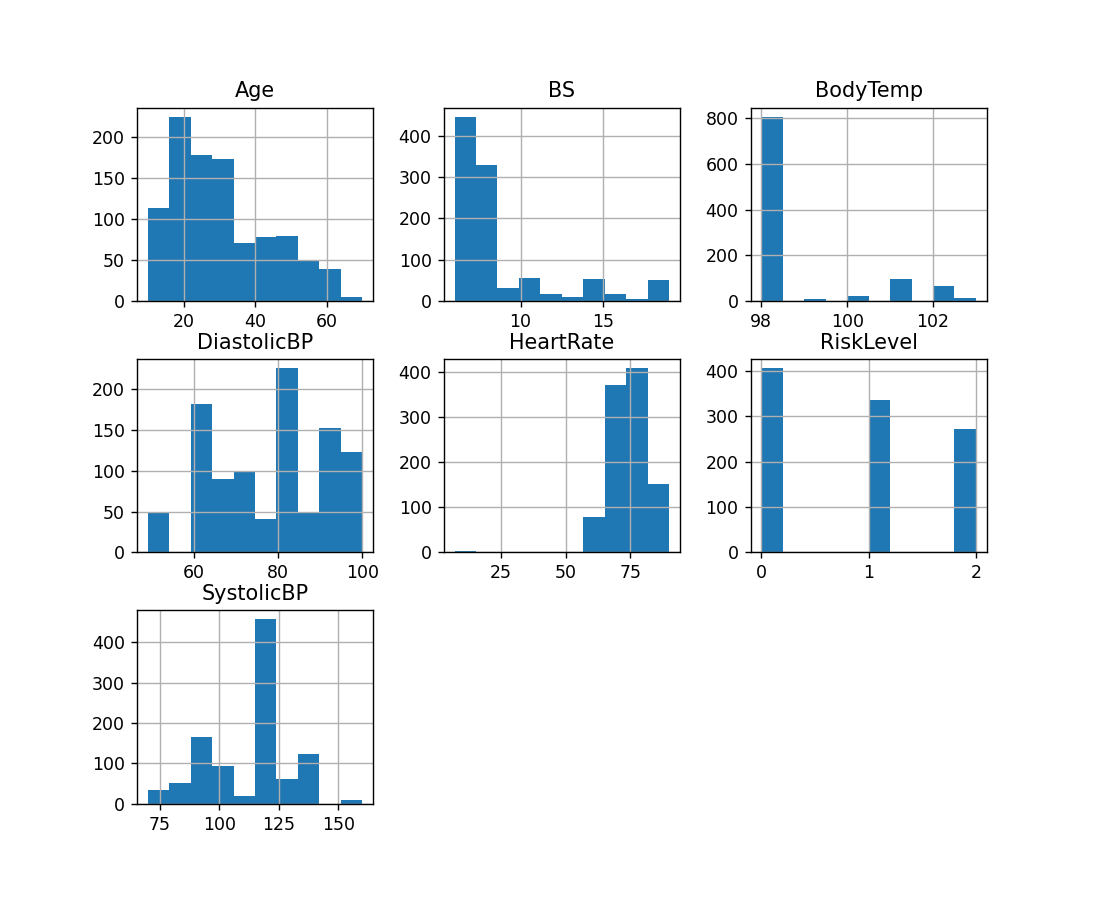

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DCE722970>,
      dtype=object)

In [79]:
df.hist()

<IPython.core.display.Javascript object>


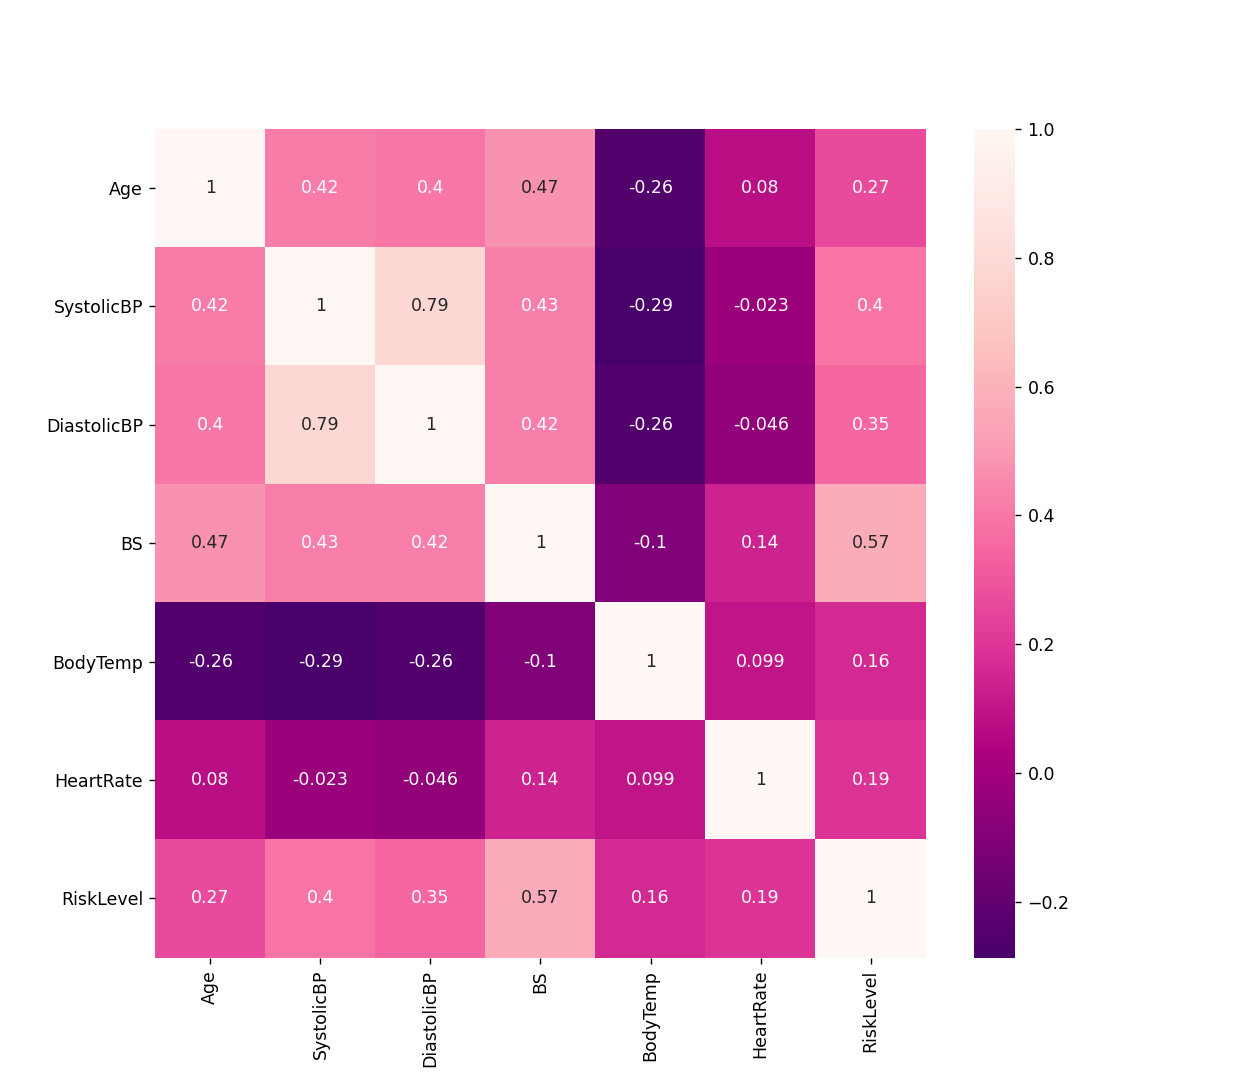

In [80]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

### The models we applied:
##### For the base line we applied GaussianNB

In [81]:
naive = GaussianNB()
naive.fit(X_train, y_train);
print('Accuracy on the training subset: {:.3f}'.format(naive.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(naive.score(X_test, y_test)))
report = classification_report(y_test, naive.predict(X_test), target_names=['0', '1','2'], output_dict=True)
q = pd.DataFrame(report)
print(classification_report(y_test, naive.predict(X_test), target_names=['0', '1','2']))

Accuracy on the training subset: 0.622
Accuracy on the test subset: 0.571
              precision    recall  f1-score   support

           0       0.52      0.97      0.68        95
           1       0.43      0.11      0.17        92
           2       0.78      0.64      0.70        67

    accuracy                           0.57       254
   macro avg       0.58      0.57      0.52       254
weighted avg       0.56      0.57      0.50       254



##### learning curves on training and testing data for GaussianNB

<IPython.core.display.Javascript object>


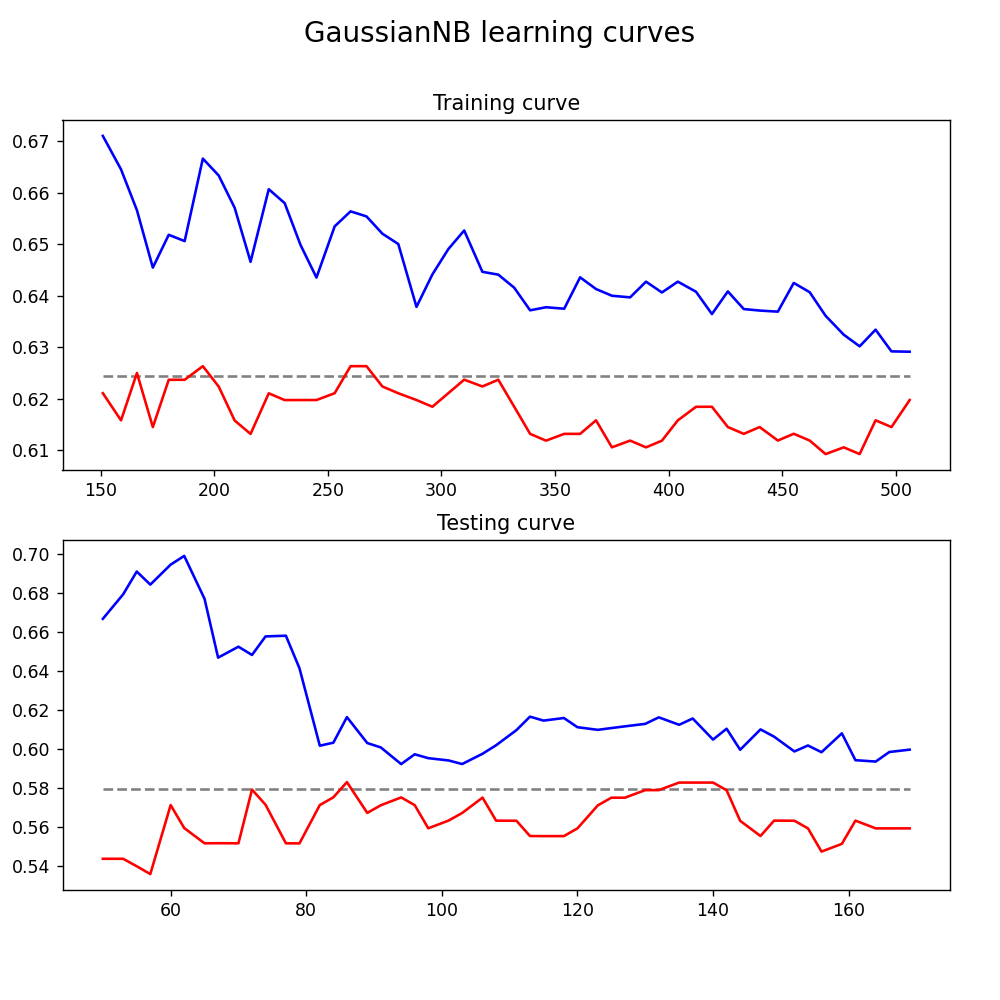

Text(0.5, 0.98, 'GaussianNB learning curves')

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(naive,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(naive,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('GaussianNB learning curves', fontsize=16)


In [39]:
y_train

342     0.0
1005    2.0
456     2.0
894     0.0
310     0.0
       ... 
835     1.0
192     2.0
629     0.0
559     0.0
684     2.0
Name: RiskLevel, Length: 760, dtype: float64

#### We start applying the different models with grid search to find the optimal value for parameters
##### LogisticRegression with gridSearchCV

In [40]:
log_reg001 = LogisticRegression()
grid_values = {'C':[0.0001,0.001,0.01,0.1,1,10,100]}
grid_clf_acc = GridSearchCV(log_reg001, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
log_reg001 = grid_clf_acc.best_estimator_

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))
print(classification_report(y_test, log_reg001.predict(X_test), target_names=['0', '1','2']))

Grid best parameter (max. accuracy):  {'C': 0.1}
Accuracy on the training subset: 0.646
Accuracy on the test subset: 0.622
              precision    recall  f1-score   support

           0       0.60      0.80      0.68        95
           1       0.53      0.38      0.44        92
           2       0.77      0.70      0.73        67

    accuracy                           0.62       254
   macro avg       0.63      0.63      0.62       254
weighted avg       0.62      0.62      0.61       254



##### learning curves on training and testing data for LogisticRegression with gridSearchCV

<IPython.core.display.Javascript object>


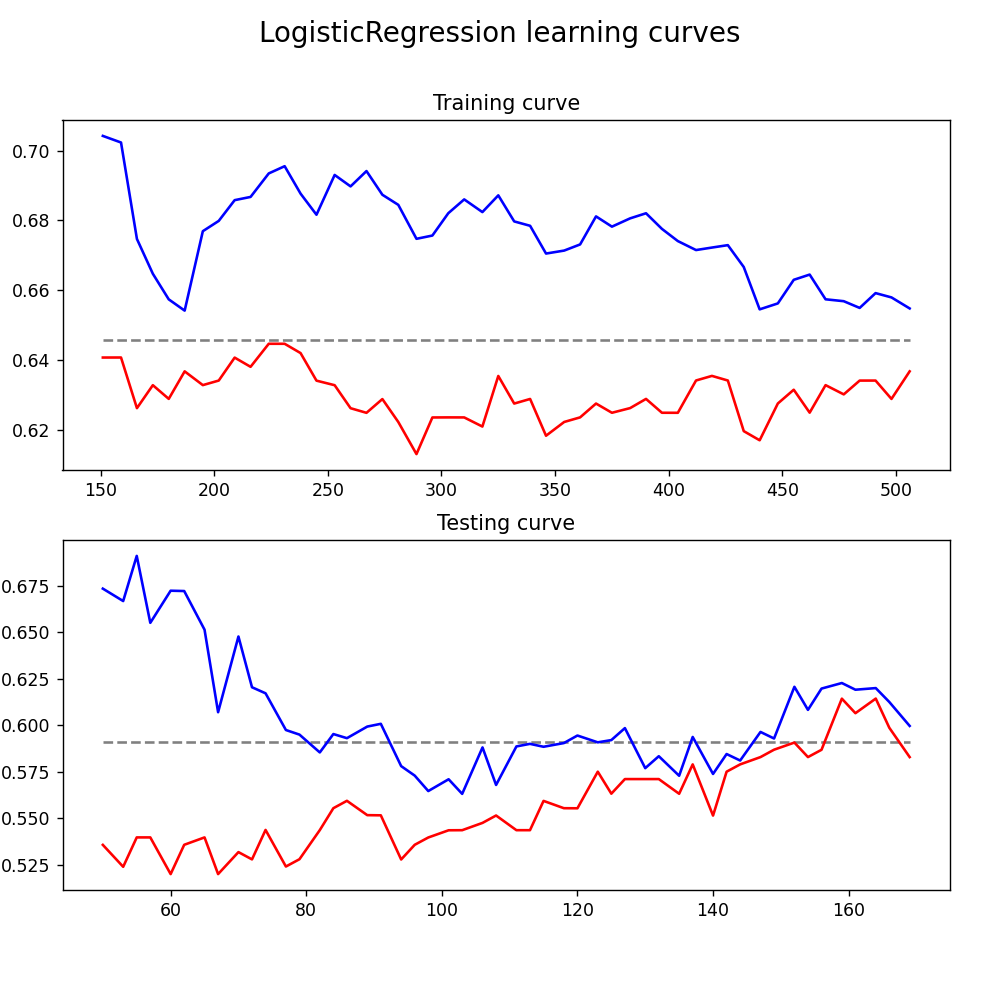

Text(0.5, 0.98, 'LogisticRegression learning curves')

In [171]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(log_reg001,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(log_reg001,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('LogisticRegression learning curves', fontsize=16)


##### DecisionTreeClassifier with gridSearchCV

In [51]:
tree_clf = DecisionTreeClassifier()

grid_values = {'criterion':['gini','entropy'],
               'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid_clf_acc = GridSearchCV(tree_clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
tree_clf = grid_clf_acc.best_estimator_

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Accuracy on the training subset: {:.3f}'.format(tree_clf.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree_clf.score(X_test, y_test)))
print(classification_report(y_test, tree_clf.predict(X_test), target_names=['0', '1','2']))

Grid best parameter (max. accuracy):  {'criterion': 'entropy', 'max_depth': 40}
Accuracy on the training subset: 0.939
Accuracy on the test subset: 0.776
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        95
           1       0.73      0.76      0.74        92
           2       0.80      0.76      0.78        67

    accuracy                           0.78       254
   macro avg       0.78      0.77      0.78       254
weighted avg       0.78      0.78      0.78       254



#### learning curves on training and testing data for DecisionTreeClassifier with gridsearchCV

<IPython.core.display.Javascript object>


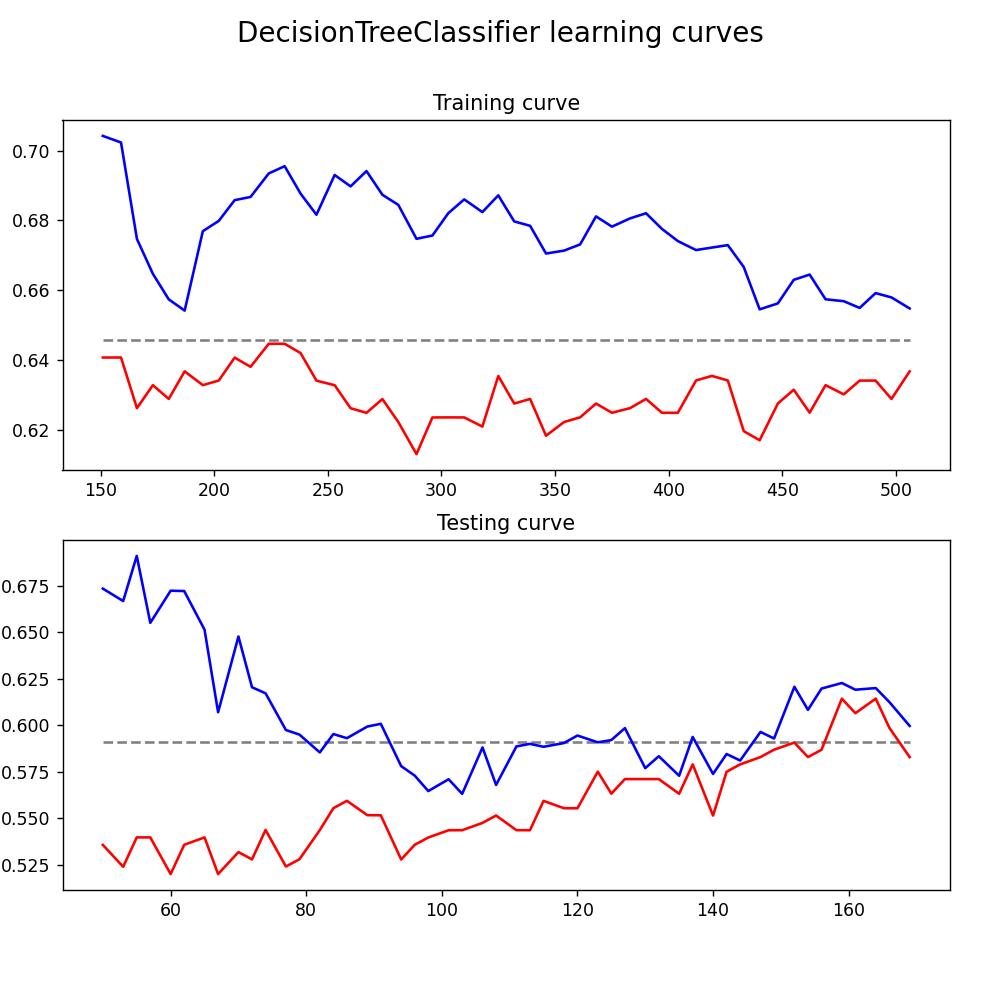

Text(0.5, 0.98, 'DecisionTreeClassifier learning curves')

In [173]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(tree_clf,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(tree_clf,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('DecisionTreeClassifier learning curves', fontsize=16)


##### SVC with gridSearchCV

In [55]:
svc = SVC()

grid_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(svc, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

svc = grid_clf_acc.best_estimator_
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Accuracy on the training subset: {:.3f}'.format(svc.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(svc.score(X_test, y_test)))

print(classification_report(y_test, svc.predict(X_test), target_names=['0', '1','2']))

Grid best parameter (max. accuracy):  {'C': 10, 'gamma': 100}
Accuracy on the training subset: 0.938
Accuracy on the test subset: 0.752
              precision    recall  f1-score   support

           0       0.68      0.85      0.75        95
           1       0.82      0.74      0.78        92
           2       0.82      0.63      0.71        67

    accuracy                           0.75       254
   macro avg       0.77      0.74      0.75       254
weighted avg       0.77      0.75      0.75       254



##### learning curves on training and testing data for SVC with gridSearchCV

<IPython.core.display.Javascript object>


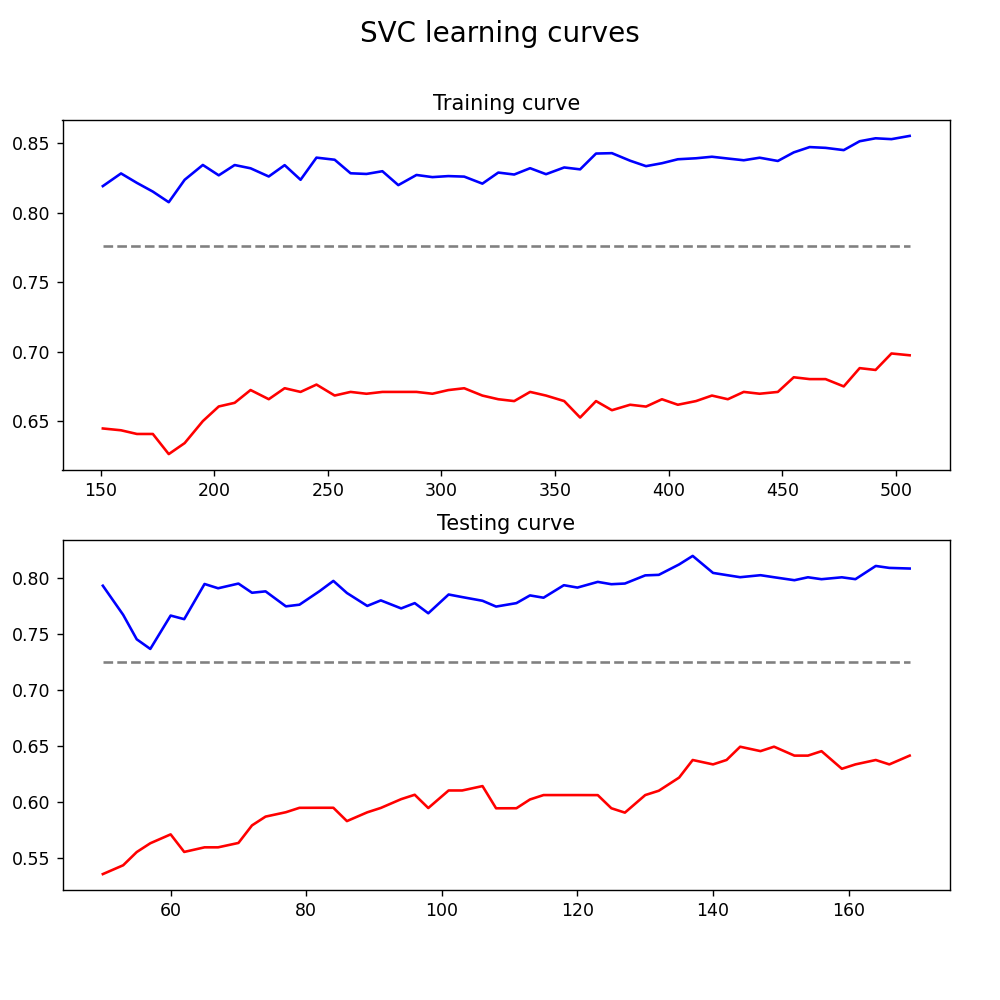

Text(0.5, 0.98, 'SVC learning curves')

In [174]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(svc,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(svc,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('SVC learning curves', fontsize=16)


##### KNeighborsClassifier with gridSearchCV

In [57]:
knn = KNeighborsClassifier()
grid_values = {'algorithm': [ 'ball_tree', 'kd_tree', 'brute'],
               'n_neighbors': [3,10,50,100,200,500]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(knn, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

knn = grid_clf_acc.best_estimator_
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Accuracy on the training subset: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(knn.score(X_test, y_test)))
print(classification_report(y_test, knn.predict(X_test), target_names=['0', '1','2']))

Grid best parameter (max. accuracy):  {'algorithm': 'kd_tree', 'n_neighbors': 3}
Accuracy on the training subset: 0.897
Accuracy on the test subset: 0.701
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        95
           1       0.64      0.61      0.62        92
           2       0.79      0.73      0.76        67

    accuracy                           0.70       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.70      0.70      0.70       254



##### learning curves on training and testing data for KNeighborsClassifier with gridSearchCV

<IPython.core.display.Javascript object>


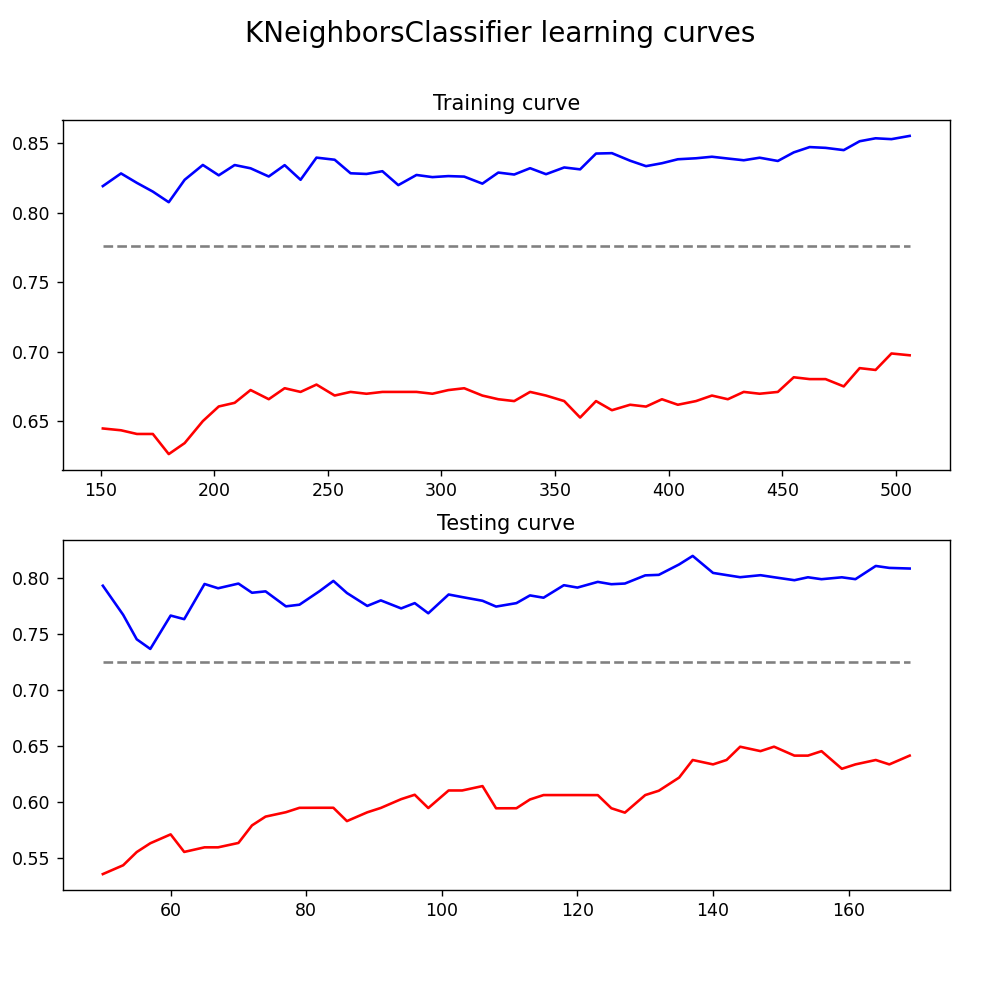

Text(0.5, 0.98, 'KNeighborsClassifier learning curves')

In [175]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(knn,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(knn,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('KNeighborsClassifier learning curves', fontsize=16)


##### RandomForestClassifier with gridSearchCV

In [59]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,  random_state=42)
grid_values = {'max_leaf_nodes': [3,5,7,10,15,20],
               'n_estimators': [10,50,100,200,500,1000]}
grid_clf_acc = GridSearchCV(rnd_clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
rnd_clf = grid_clf_acc.best_estimator_

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Accuracy on the training subset: {:.3f}'.format(rnd_clf.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(rnd_clf.score(X_test, y_test)))
print(classification_report(y_test, rnd_clf.predict(X_test), target_names=['0', '1','2']))

Grid best parameter (max. accuracy):  {'max_leaf_nodes': 20, 'n_estimators': 500}
Accuracy on the training subset: 0.801
Accuracy on the test subset: 0.709
              precision    recall  f1-score   support

           0       0.68      0.88      0.77        95
           1       0.69      0.40      0.51        92
           2       0.77      0.88      0.82        67

    accuracy                           0.71       254
   macro avg       0.71      0.72      0.70       254
weighted avg       0.71      0.71      0.69       254



##### learning curves on training and testing data for RandomForestClassifier with gridSearchCV

<IPython.core.display.Javascript object>


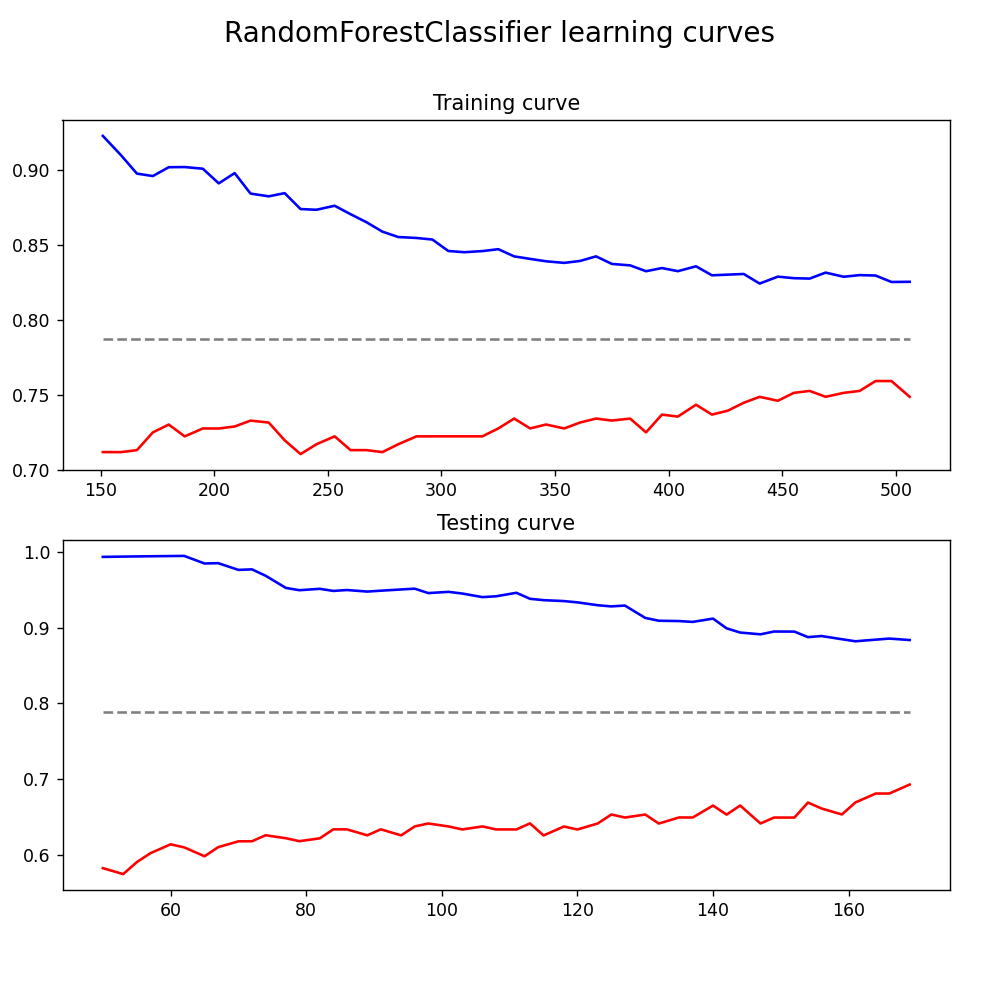

Text(0.5, 0.98, 'RandomForestClassifier learning curves')

In [176]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(rnd_clf,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(rnd_clf,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('RandomForestClassifier learning curves', fontsize=16)


##### AdaBoostClassifier

In [61]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=8), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(ada_clf.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(ada_clf.score(X_test, y_test)))
print(classification_report(y_test, ada_clf.predict(X_test), target_names=['0', '1','2']))

Accuracy on the training subset: 0.924
Accuracy on the test subset: 0.787
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        95
           1       0.77      0.79      0.78        92
           2       0.87      0.72      0.79        67

    accuracy                           0.79       254
   macro avg       0.80      0.78      0.79       254
weighted avg       0.79      0.79      0.79       254



##### learning curves on training and testing data for AdaBoostClassifier

<IPython.core.display.Javascript object>


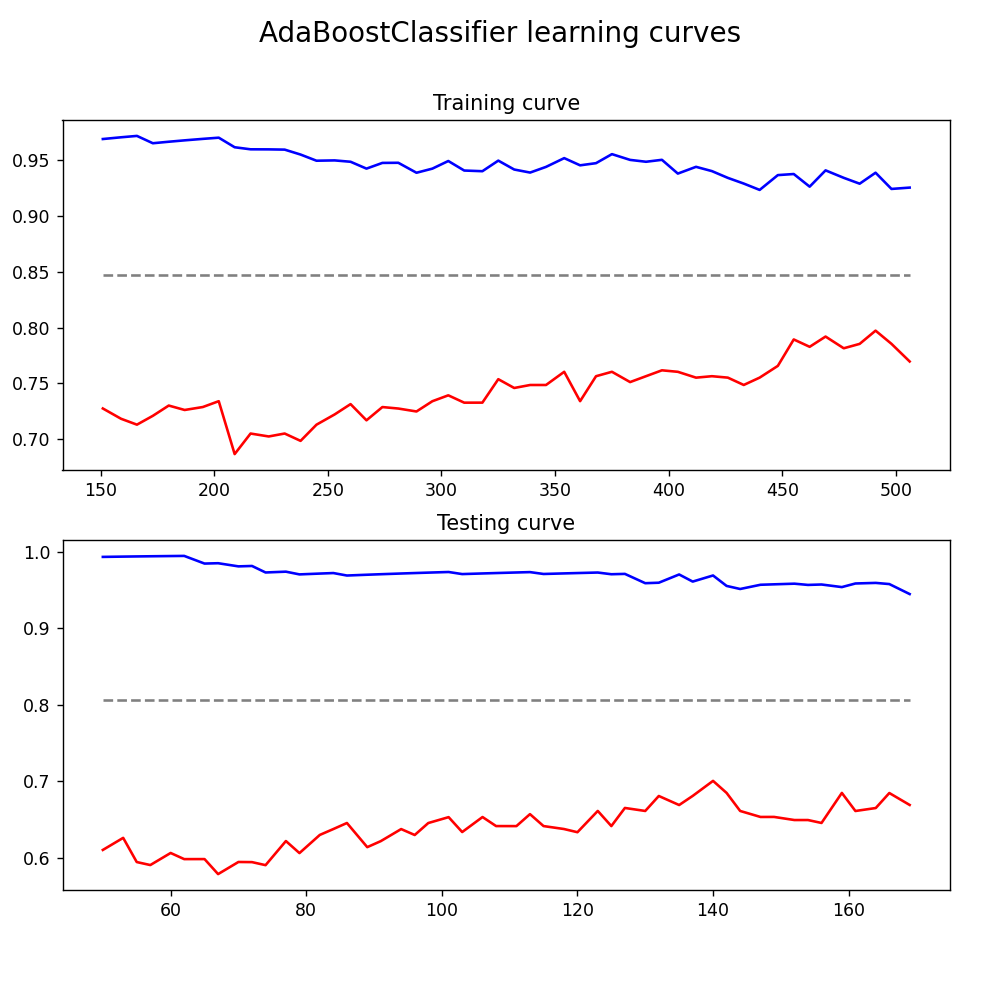

Text(0.5, 0.98, 'AdaBoostClassifier learning curves')

In [177]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(ada_clf,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(ada_clf,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('AdaBoostClassifier learning curves', fontsize=16)


##### GradientBoostingRegressor

In [64]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(gbrt_best.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(gbrt_best.score(X_test, y_test)))
print(classification_report(y_test, gbrt.predict(X_test), target_names=['0', '1','2']))

Accuracy on the training subset: 0.820
Accuracy on the test subset: 0.760
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        95
           1       0.67      0.67      0.67        92
           2       0.84      0.85      0.84        67

    accuracy                           0.75       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.75      0.75      0.75       254



#### learning curves on training and testing data for GradientBoostingClassifier with gridSearchCV

<IPython.core.display.Javascript object>


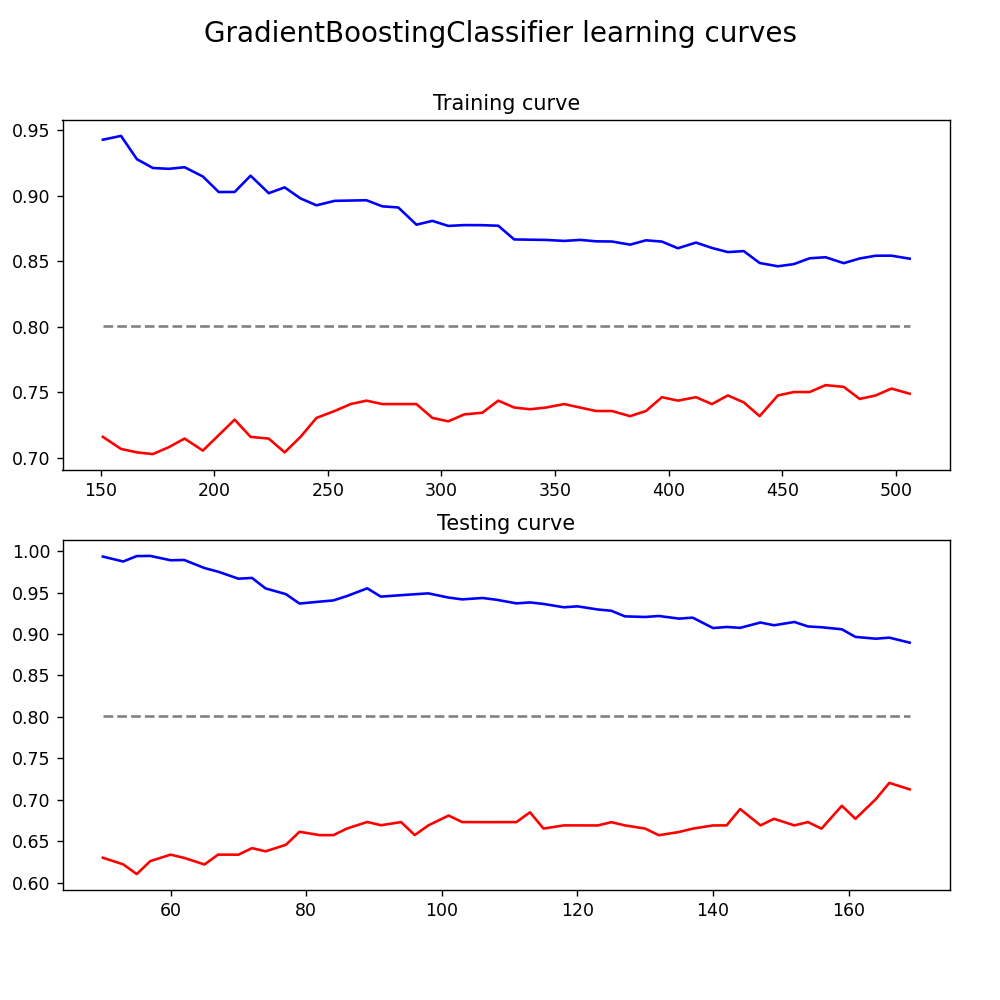

Text(0.5, 0.98, 'GradientBoostingClassifier learning curves')

In [178]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(gbrt,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(gbrt,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('GradientBoostingClassifier learning curves', fontsize=16)


##### xgboost with gridSearchCV

In [66]:
#Applying XGBoost
import xgboost as xgb

#Create XGBClassifier
xgb_clf = xgb.XGBClassifier()

grid_values = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.01,0.05,0.1,0.2,0.5], #so called `eta` value
              'max_depth': [6,8,10,12,15,17,21],
              'n_estimators': [30,50,100] #number of trees, change it to 1000 for better results
              }
grid_clf_acc = GridSearchCV(xgb_clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
xgb_clf = grid_clf_acc.best_estimator_

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print("Train accuracy:",xgb_clf.score(X_train,y_train))
print("Test accuracy:",xgb_clf.score(X_test,y_test))
print(classification_report(y_test, xgb_clf.predict(X_test), target_names=['0', '1','2']))

Grid best parameter (max. accuracy):  {'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 30, 'nthread': 4}
Train accuracy: 0.9368421052631579
Test accuracy: 0.7874015748031497
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        95
           1       0.72      0.74      0.73        92
           2       0.85      0.82      0.83        67

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.79      0.79      0.79       254



##### learning curves on training and testing data for xgboost with gridSearchCV

<IPython.core.display.Javascript object>


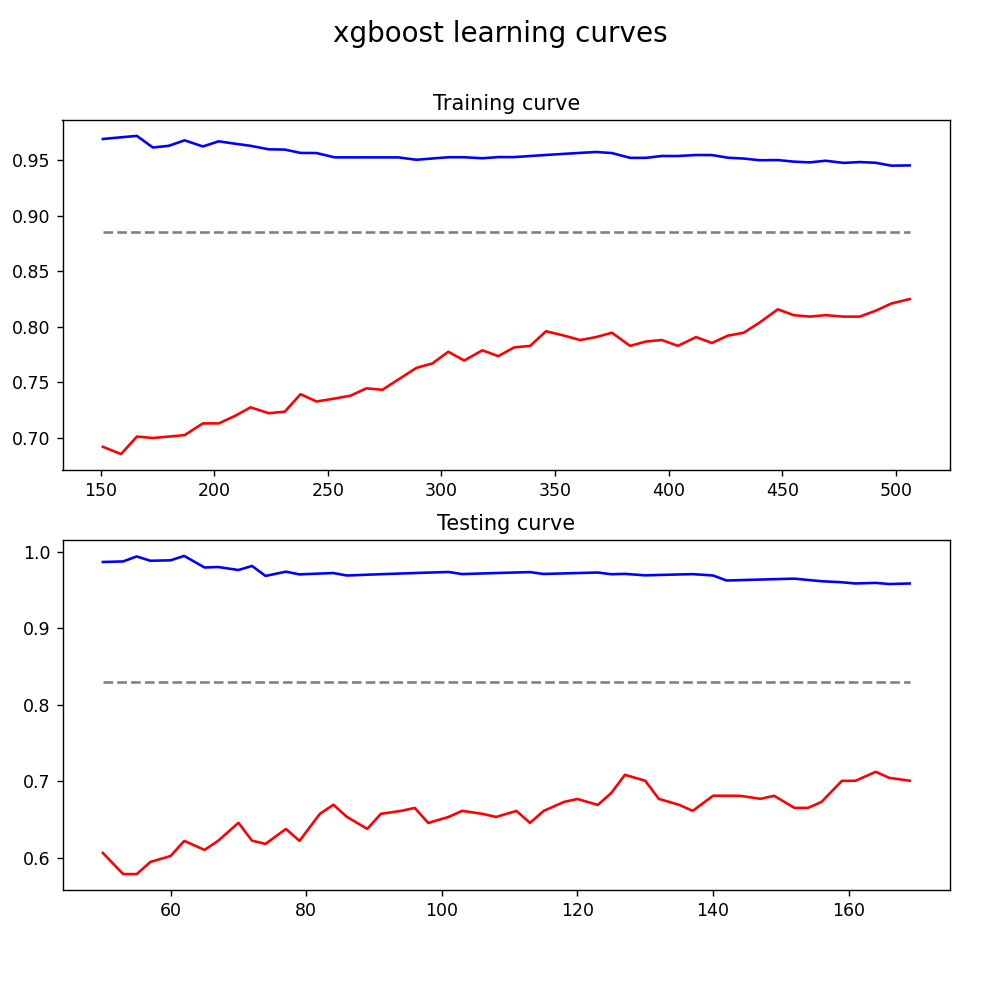

Text(0.5, 0.98, 'xgboost learning curves')

In [179]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

N, train_lc, val_lc = learning_curve(xgb_clf,
                                     X_train, y_train, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[0].set_title('Training curve')
ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
N, train_lc, val_lc = learning_curve(xgb_clf,
                                     X_test, y_test, cv=3,
                                     train_sizes=np.linspace(0.3, 1, 50))
ax[1].set_title('Testing curve')
ax[1].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[1].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[1].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')
fig.suptitle('xgboost learning curves', fontsize=16)


In [83]:
evaluations =  pd.read_csv('evaluation metric1.csv', sep=',', na_values='?')
evaluations

,precision,recall,f1-score,support,model-name
0,0.579776,0.572969,0.519266,254.0,GaussianNB
1,0.633073,0.627309,0.620699,254.0,LogisticRegression
2,0.778184,0.774021,0.775847,254.0,DecisionTreeClassifier
3,0.772602,0.739543,0.747499,254.0,SVC
4,0.709536,0.702820,0.705193,254.0,KNeighborsClassifier
5,0.711449,0.722327,0.698979,254.0,RandomForestClassifier
6,0.800255,0.780492,0.787201,254.0,AdaBoostClassifier
7,0.765241,0.773620,0.768933,254.0,GradientBoostingClassifier
8,0.793361,0.790184,0.791681,254.0,XGBClassifier
